In [84]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

In [3]:
#Importing the dataset
df= pd.read_csv("data/Advertising_data.csv")

DATA CHECK

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


In [5]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,760
196,94.2,4.9,8.1,970
197,177.0,9.3,6.4,1280
198,283.6,42.0,66.2,2550
199,232.1,8.6,8.7,1340


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [8]:
df.describe()
#std is a measure of spread(sigma)
#68-95-99.7 rule
#mmm is measure of center
#range and std are measure of spread
#mode = repeated vale
#mean= average samation (xi)/n(balance point)
#median = mid value(accend)(n+1)/2(physical middle point)
#range = max-min


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,1402.250000
std,85.854236,14.846809,21.778621,521.745657
min,0.700000,0.000000,0.300000,160.000000
25%,74.375000,9.975000,12.750000,1037.500000
50%,149.750000,22.900000,25.750000,1290.000000
75%,218.825000,36.525000,45.100000,1740.000000
max,296.400000,49.600000,114.000000,2700.000000


In [9]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

EDA

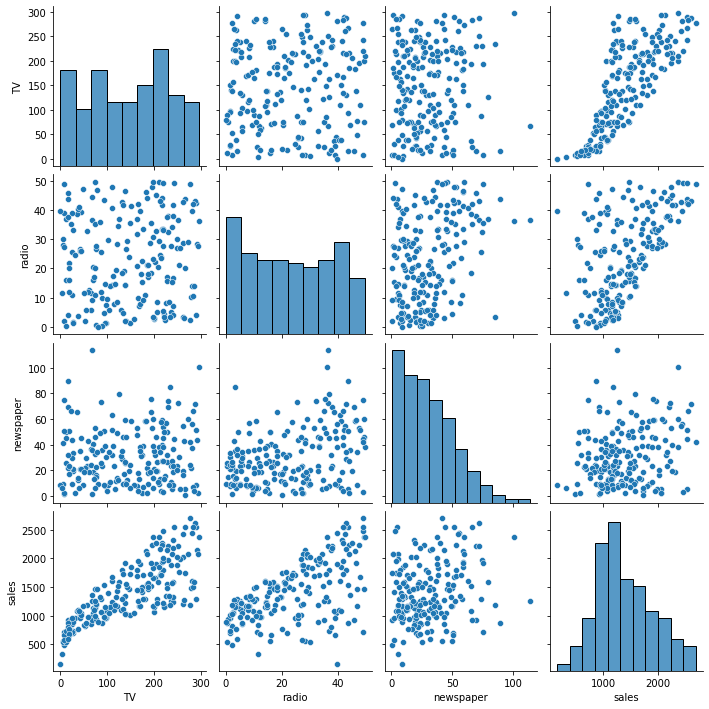

In [10]:
sns.pairplot(df)

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

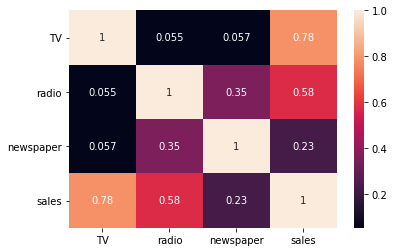

In [14]:
sns.heatmap(df.corr(), annot= True)

Training a LR Model

In [29]:
#x and y arrays
X = df['TV'].values.reshape(-1,1)
y = df['sales'].values.reshape(-1,1)

Train Test Split

In [18]:
from sklearn.model_selection import train_test_split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Creating and Training the Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [37]:
lr.fit(X_train,y_train)

LinearRegression()

Model Evaluatioin

In [38]:
# print the intercept
print(lr.intercept_)

[717.70578026]


In [40]:
lr.coef_

array([[4.70416535]])

Prediction

In [41]:
predict = lr.predict(X_test)

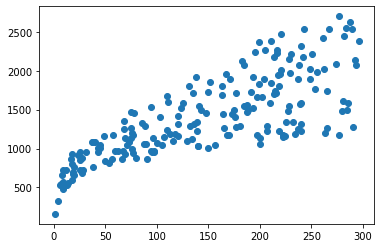

In [47]:
plt.scatter(X,y)
#y axis sales

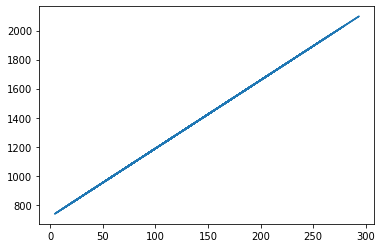

In [43]:
plt.plot(X_test,predict)

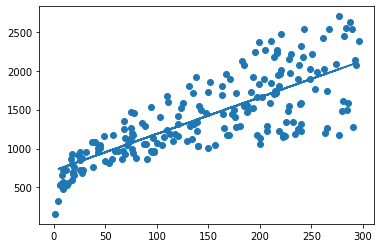

In [45]:
plt.scatter(X,y)
plt.plot(X_test,predict)

Regression Evaluation

In [52]:
from sklearn.metrics import r2_score

In [54]:
r2_score(y_test,predict)

0.6345141851817351

Multiple Linear Regression

In [55]:
#Initializing the variables
X = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1,1)

In [56]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression()

In [76]:
#predicting the Test set result
y_pred = multiple_reg.predict(X_test)


In [59]:
#Calculating the Coefficients
multiple_reg.coef_

array([[ 4.47295175, 18.91950542,  0.27611143]])

In [60]:
#Calculating the Intercept
multiple_reg.intercept_

array([297.90673381])

In [61]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

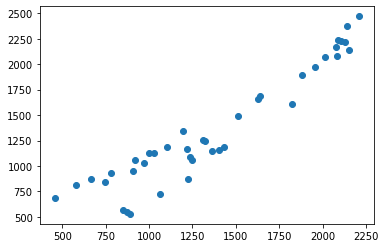

In [64]:
plt.scatter(y_pred,y_test)
#y axis sales

In [85]:
#Taking the input from the user
print("Enter the ammount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))

#predicting the sales with respect to the inputs
output = multiple_reg.predict([[tv,radio,newspaper]])
print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

Enter the ammount you will invest on:
TV : 500
Radio : 500
Newspaper : 500
you will get Rs12132.19 sales by advertising Rs500.0 on TV, Rs500.0 on Radio and Rs500.0 on newspaper.


In [67]:
output

2

In [68]:
filename = 'Sale_predict_model'
pickle.dump(multiple_reg, open(filename,'wb'))

In [69]:
loaded_model = pickle.load(open(filename,'rb'))

In [83]:
loaded_model.predict([[0,0,0]])

array([[297.90673381]])